In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### Creating own Linear Regression Model Class

In [3]:
class Own_linear_regression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit (self, X, Y):
        den = 0
        num = 0
        for i in range(X.shape[0]):
            num += (X[i] - np.mean(X)) * (Y[i] - np.mean(Y))
            den += (X[i] - np.mean(X)) ** 2
            
        self.coef_ = num / den
        self.intercept_ = np.mean(Y) - self.coef_ * np.mean(X)
    
    def predict(self, X):
        return self.intercept_ + self.coef_ * X
    
# Limitation is that the data should have a linear relationship and one independent variable

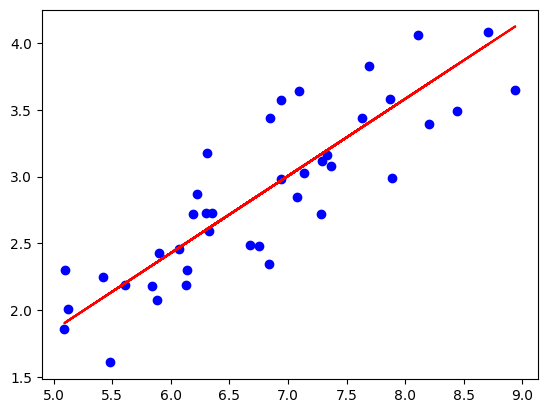

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day48-simple-linear-regression/placement.csv')

X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

regressor = Own_linear_regression()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

plt.plot(X_test, Y_pred, color = 'red')
plt.scatter(X_test, Y_test, color = 'blue')
plt.show()

## Multiple Linear Regression 
* When there are more than one independent variables in the dataset. 
* It is an extension of simple linear regression. 
<br>
<br>

+ **Y = β0 + β1X1 + β2X2 + … + βnXn + ε**


In [3]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression   
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f'Intercept: {reg.intercept_}')
print(f'Coefficients: {reg.coef_}')

Mean squared error: 3424.2593
R-squared: 0.3322
Intercept: 152.5380470138517
Coefficients: [ -35.55025079 -243.16508959  562.76234744  305.46348218 -662.70290089
  324.20738537   24.74879489  170.3249615   731.63743545   43.0309307 ]


### Making Own Linear Regression 

In [ ]:
class Own_Multiple_linear_regression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis = 1)  # Inserts the one column at the start of the array
        
        beta = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = beta[0]
        self.coef_ = beta[1:]

        
    def predict(self, X_test):
        y_pred = np.dot(X_test, self.coef_) + self.intercept_
        return y_pred

        
reg = Own_Multiple_linear_regression()
reg.fit(X_train, y_train)
reg.predict(X_test)

print(f"R-squared: {r2:.4f}")

R-squared: 0.3322


## Polynomial Regression

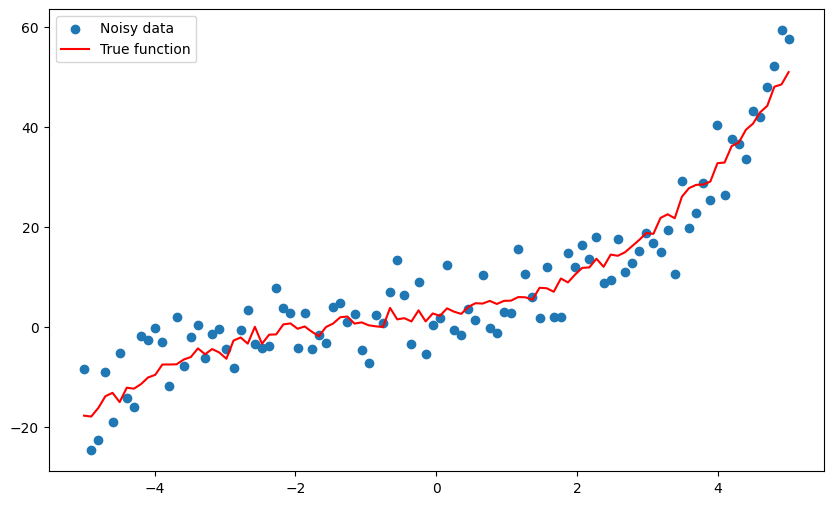

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(0)

# Define the true polynomial function
def true_function(x):
    return 3 + 2 * x + 0.5 * x**2 + 0.2 * x**3 + np.random.normal(0, 1, size=len(x))

# Generate the synthetic data
x = np.linspace(-5, 5, 100)
y = true_function(x)

# Add some noise to the data
y_noisy = y + np.random.normal(0, 5, size=len(y))

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, label='Noisy data')
plt.plot(x, y, label='True function', color='red')
plt.legend()
plt.show()

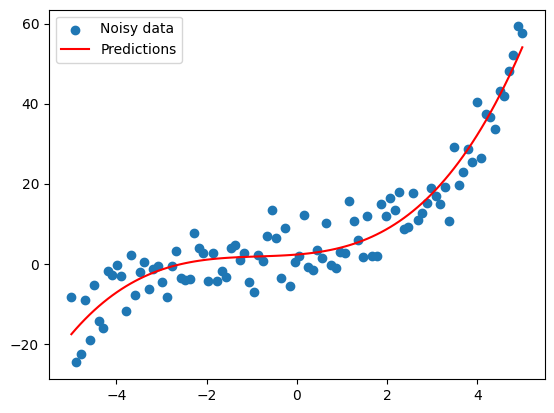

Coefficients: [0.         0.91948466 0.63729427 0.2497843 ]
Intercept: 2.3026404268509557


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Set the seed for reproducibility
np.random.seed(0)

# Define the true polynomial function
def true_function(x):
    return 3 + 2 * x + 0.5 * x**2 + 0.2 * x**3 + np.random.normal(0, 1, size=len(x))

# Generate synthetic data (x must be 1D for plt.scatter)
x = np.linspace(-5, 5, 100)  # Now shape (100,) instead of (100,1)
y = true_function(x)  # shape (100,)

# Add noise
y_noisy = y + np.random.normal(0, 5, size=len(y))  # shape (100,)

# Reshape x to (100,1) for sklearn (needs 2D input)
x_sklearn = x.reshape(-1, 1)  # Now shape (100,1)

# Create and train the model
model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model.fit(x_sklearn, y_noisy)  # x_sklearn (100,1), y_noisy (100,)

# Predictions
y_pred = model.predict(x_sklearn)  # shape (100,)

# Plot (x is 1D, y_noisy and y_pred are 1D)
plt.scatter(x, y_noisy, label='Noisy data')  # x (100,), y_noisy (100,)
plt.plot(x, y_pred, label='Predictions', color='red')  # x (100,), y_pred (100,)
plt.legend()
plt.show()

# Print coefficients
print('Coefficients:', model.named_steps['linearregression'].coef_)
print('Intercept:', model.named_steps['linearregression'].intercept_)